# Multi-Well Data Integration Analysis

This notebook/script performs a combined multi-well analysis to identify and visualize the relationships between well log data and laboratory geochemical measurements across multiple wells.



# 1. Environment Setup and Library Imports

This section imports all required libraries and configures the analysis environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
import missingno as msno
import os
from All_well_analysis import *


# Configure matplotlib for proper saving and display
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')  
plt.ion()  #

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directory for plots
Path('imgs').mkdir(exist_ok=True)



# 2. Multi-Well Data Loading and Integration

This section loads data from all available wells, handles duplicate columns (particularly in HRDH_1867), and combines them into a unified dataset for cross-well analysis.

In [2]:
'''
Understanding Correlation Thresholds and Classifications
Let me explain how the correlation threshold affects your analysis and what the "valid correlations" metric means:

Valid Correlations (561/1645)
The 561/1645 valid correlations statistic is not directly affected by changing the corr_threshold parameter. Here's what this number represents:

561 = Number of log-lab variable pairs where a correlation could be successfully calculated
1645 = Total possible log-lab variable pairs that could theoretically be correlated
Validity criteria:
At least min_samples=10 data points exist for both variables
Both variables have non-zero variance (not constant values)
No calculation errors occurred
This ratio (561/1645 = 34.1%) represents your data coverage - the portion of possible relationships that have enough data to calculate correlations.

How corr_threshold=0.3 Works
The corr_threshold parameter determines which correlations are considered strong enough to be included in the results and visualizations, not how many are calculated:

When set to 0.3, only correlations with |r| ≥ 0.3 are kept for further analysis
Changing it to 0.2 would include more (weaker) correlations in your results
Changing it to 0.5 would include fewer (only stronger) correlations
'''
# Basic usage with default parameters
# df_all, well_correlations, well_stats, common_correlations = analyze_wells()

# strong_corr > 0.5
# moderate_corr 0.5 <= r < 0.7
# Customize parameters
min_corr = 0.1
df_all, well_correlations, well_stats, common_correlations = analyze_wells(
    base_path=".",
    corr_threshold=min_corr,    # Lower threshold to find more correlations
    min_samples=8,              # Minimum samples per correlation
    min_wells=2                 # Require correlations to appear in at least 2 wells
)

# Export common correlations to CSV
common_correlations.to_csv("common_correlations.csv", index=False)

# df_all


Found 4 joined CSV files:
  HRDH_1119\HRDH_1119_joined.csv
  HRDH_1804\HRDH_1804_joined.csv
  HRDH_1867\HRDH_1867_joined.csv
  HRDH_697\HRDH_697_joined.csv
Loaded HRDH_1119: 18 samples, 73 columns
Loaded HRDH_1804: 41 samples, 56 columns
Loaded HRDH_1867: 9 samples, 59 columns
Loaded HRDH_697: 10 samples, 66 columns

Combined dataset: 78 total samples from 4 wells
Wells: HRDH_1119, HRDH_1804, HRDH_1867, HRDH_697
Total columns: 89
Found 35 lab variables and 47 log variables

Processing HRDH_1119...
  HRDH_1119: 561/1645 valid correlations (34.1% coverage)
  Mean |r|: 0.367, Strong: 42, Moderate: 131
Processing HRDH_1804...
  HRDH_1804: 145/1645 valid correlations (8.8% coverage)
  Mean |r|: 0.257, Strong: 0, Moderate: 11
Processing HRDH_1867...
  HRDH_1867: 279/1645 valid correlations (17.0% coverage)
  Mean |r|: 0.357, Strong: 33, Moderate: 53
Processing HRDH_697...
  HRDH_697: 425/1645 valid correlations (25.8% coverage)
  Mean |r|: 0.356, Strong: 33, Moderate: 89

CORRELATION ANALYSI

# 4. Data Quality Assessment and Missing Value Analysis

This section evaluates data completeness across wells, identifies patterns in missing data, and visualizes data availability to understand limitations for correlation analysis.

Creating comprehensive missing data visualizations by well...


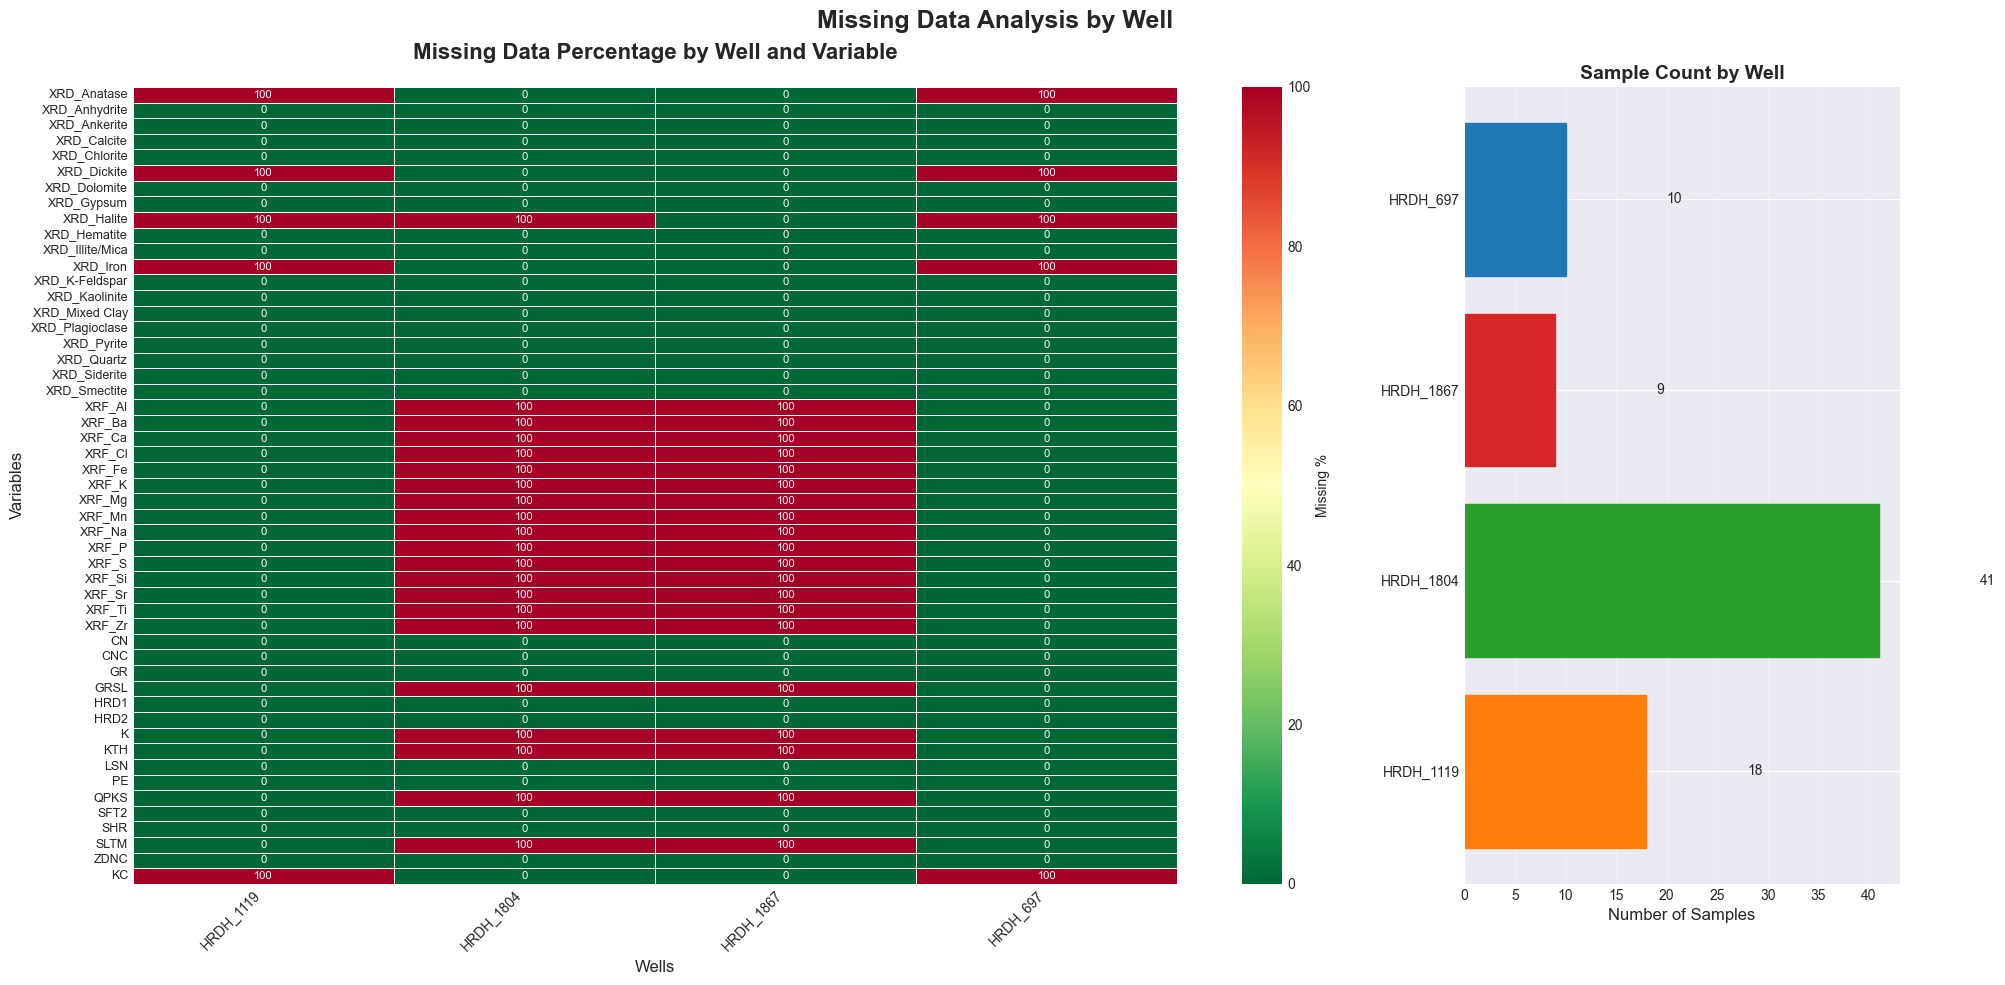


MISSING DATA ANALYSIS SUMMARY

Overall Missing Data by Well:
------------------------------------------------------------
HRDH_1119:
  Total samples: 18
  Overall missing: 9.8%
  Lab data missing: 11.4%
  Log data missing: 6.2%
HRDH_1804:
  Total samples: 41
  Overall missing: 41.2%
  Lab data missing: 45.7%
  Log data missing: 31.2%
HRDH_1867:
  Total samples: 9
  Overall missing: 39.2%
  Lab data missing: 42.9%
  Log data missing: 31.2%
HRDH_697:
  Total samples: 10
  Overall missing: 9.8%
  Lab data missing: 11.4%
  Log data missing: 6.2%

Variables with Highest Completeness (>90%):
------------------------------------------------------------
  - XRD_Pyrite: 100.0% average completeness
  - XRD_Mixed Clay: 100.0% average completeness
  - CNC: 100.0% average completeness
  - GR: 100.0% average completeness
  - HRD1: 100.0% average completeness
  - HRD2: 100.0% average completeness
  - XRD_Anhydrite: 100.0% average completeness
  - LSN: 100.0% average completeness
  - PE: 100.0% avera

In [3]:

# Call the enhanced visualization function
print("Creating comprehensive missing data visualizations by well...")

# Define lab_columns and log_columns before using them
lab_columns = [col for col in df_all.columns if col.startswith('Lab_') and 
              col not in ['Lab_Depth', 'Lab_Sample_ID']]
log_columns = [col for col in df_all.columns if col.startswith('Log_') and 
              col not in ['Log_Depth', 'Log_FRAMENO']]

# Restrict specific_logs to only those present in log_columns (with 'Log_' prefix)
specific_logs = ['CN', 'CNC', 'GR', 'GRSL', 'HRD1', 'HRD2', 'K', 'KTH', 'LSN', 
                'PE', 'QPKS', 'SFT2', 'SHR', 'SLTM', 'ZDNC', 'KC']
specific_logs_in_data = [log for log in specific_logs if f'Log_{log}' in log_columns]
specific_log_columns  = [f'Log_{log}' for log in specific_logs_in_data]

# Now call the function with the defined variables (all logs)
# visualize_missing_data_by_well(df_all, lab_columns, log_columns)

# specific_log_columns
visualize_missing_data_by_well(df_all, lab_columns, specific_log_columns)


# Visualize Common Correlations - Combined Scatter Plots


## Heatmap


Creating combined(correlation) correlation heatmaps...
Using 16 specific log columns
Using 35 lab columns


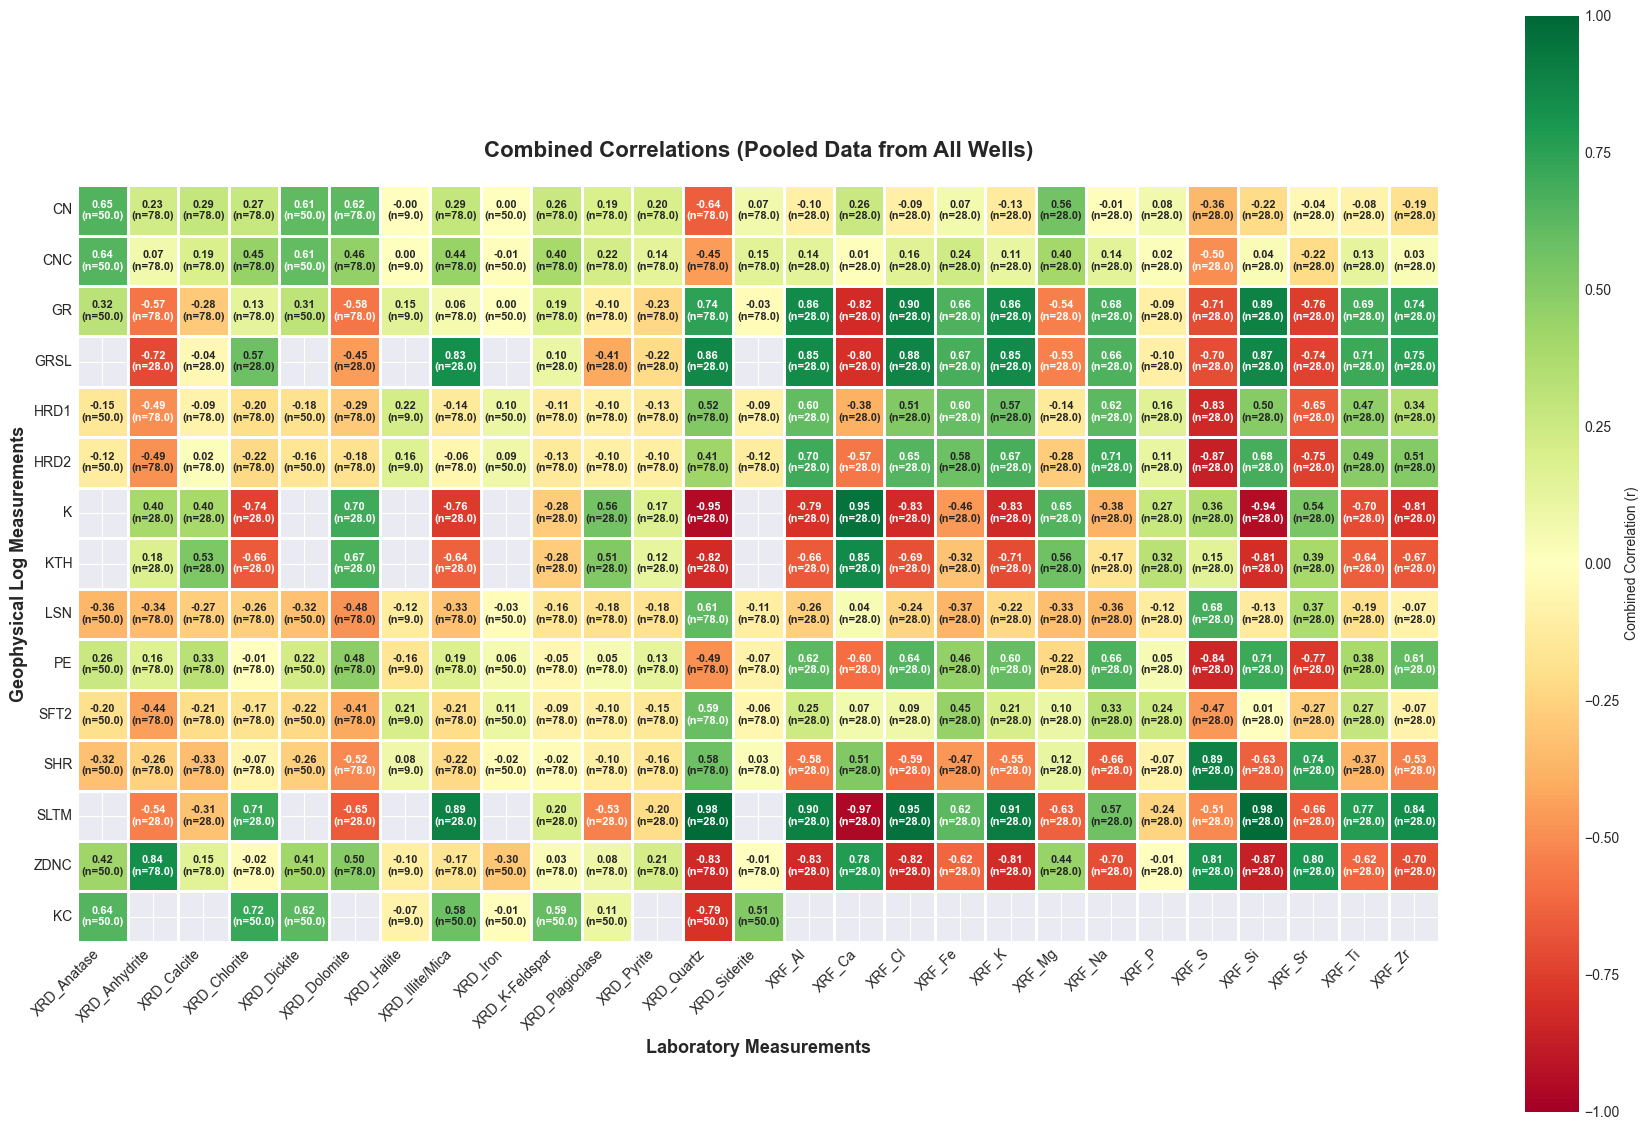

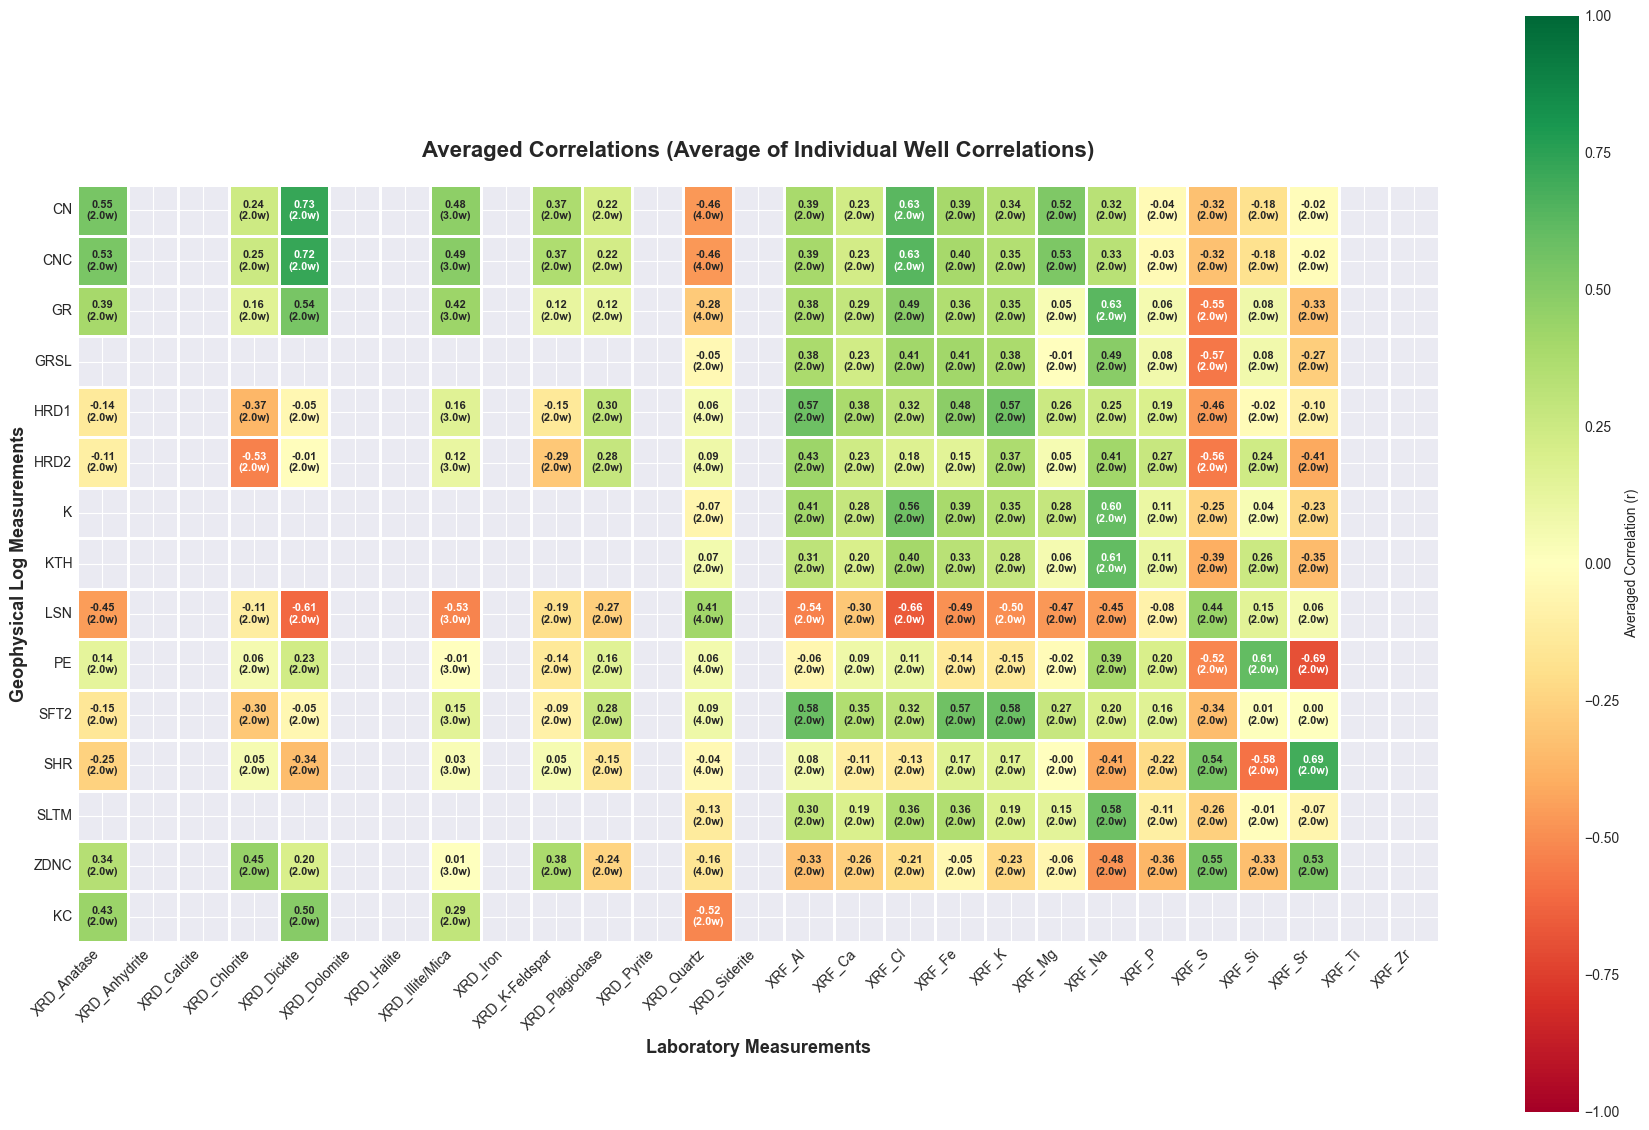

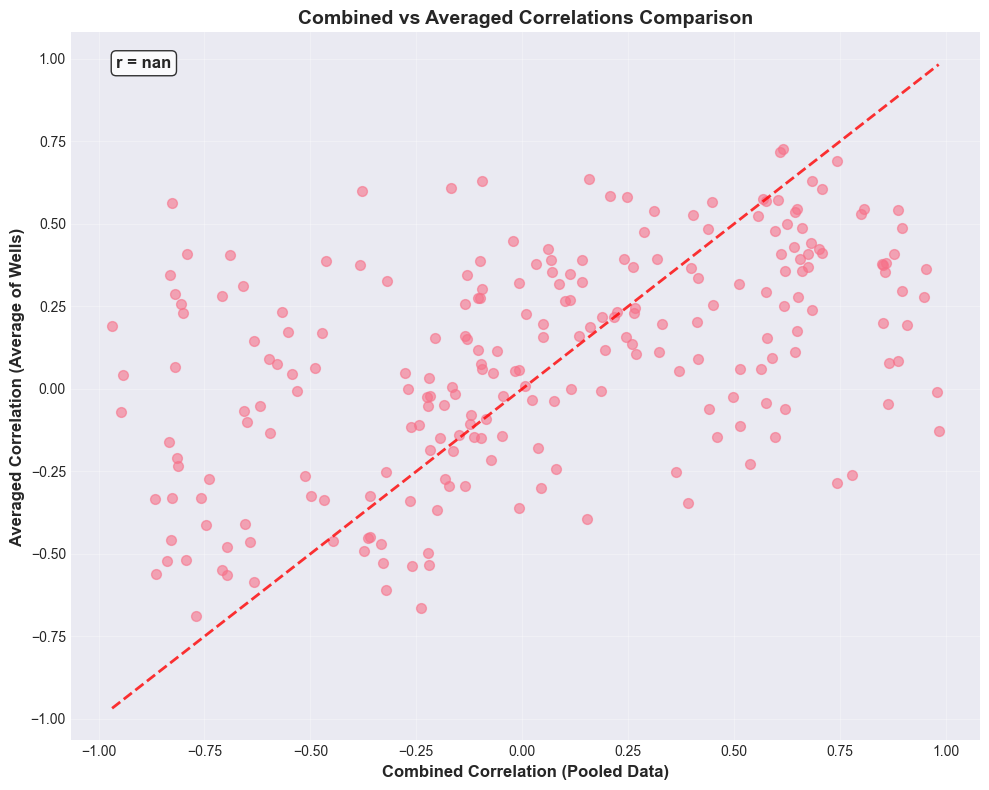

In [4]:

#  heatmap 
'''
Heatmap Values (Standardized)
The heatmap displays correlation coefficients (r values)
These range from -1 to 1, representing standardized relationship strength
The color gradient represents the strength and direction of correlation
What's shown in each cell is the calculated Pearson correlation coefficient
These are standardized statistical measures, not actual data points

the heatmap function The heatmap displays ALL valid correlations that can be calculated.
corr_threshold parameter in analyze_wells() does NOT affect the number of correlations shown in the heatmap
'''
print("\nCreating combined(correlation) correlation heatmaps...")

specific_logs = ['CN', 'CNC', 'GR', 'GRSL', 'HRD1', 'HRD2', 'K', 'KTH', 'LSN', 
                'PE', 'QPKS', 'SFT2', 'SHR', 'SLTM', 'ZDNC', 'KC']

# Convert specific logs to proper column names and filter to only those that exist in df_all
specific_log_columns = [f'Log_{log}' for log in specific_logs if f'Log_{log}' in df_all.columns]

print(f"Using {len(specific_log_columns)} specific log columns")
print(f"Using {len(lab_columns)} lab columns")

# Call with specific log columns instead of all log columns
combined_corr_matrix, sample_size_matrix = create_combined_correlation_heatmap(
    df_all, lab_columns, specific_log_columns, well_correlations,
    common_correlations=common_correlations  
)

## Scatterplot

In [5]:
# Organize correlations by well count
correlations_by_well_count = {2: [], 3: [], 4: []}

# Process common_correlations to populate the dictionary
for _, row in common_correlations.iterrows():
    n_wells = row['num_wells']
    
    if n_wells in correlations_by_well_count:
        log_var = row['log_var']
        lab_var = row['lab_var']
        
        # Only include if it's in your specific logs (if you want to filter)
        if specific_logs and log_var.replace('Log_', '') not in specific_logs:
            continue
            
        # Extract individual well correlations using the individual well correlation columns
        wells_data = []
        for well in row['wells_found_in']:
            # Use the individual well correlation columns from the updated find_common_correlations
            well_r_col = f"{well}_r"
            
            if well_r_col in row and pd.notna(row[well_r_col]):
                wells_data.append((well, row[well_r_col]))
        
        # Only add if we have data for all expected wells
        if len(wells_data) == n_wells:
            # Create info dictionary using AVERAGED correlations from find_common_correlations
            info = {
                'avg_corr': row['avg_r'],  # This is now the average of individual correlations
                'avg_abs_corr': row['avg_abs_r'],
                'std_corr': row['std_r'],
                'n_wells': n_wells,
                'correlation_type': 'Positive' if row['avg_r'] > 0 else 'Negative',
                'consistent_direction': row['consistent_direction'],
                'missing_wells': [w for w in df_all['Well'].unique() if w not in row['wells_found_in']]
            }
            
            correlations_by_well_count[n_wells].append(((log_var, lab_var), wells_data, info))

# Sort correlations by absolute value before plotting
for n_wells in correlations_by_well_count:
    correlations_by_well_count[n_wells].sort(key=lambda x: x[2]['avg_abs_corr'], reverse=True)

# Print summary of what was loaded
for n_wells, corrs in correlations_by_well_count.items():
    print(f"\n{n_wells}-well correlations: {len(corrs)} pairs")
    if corrs:
        # Show top 5 instead of just 3
        print(f"Top {min(5, len(corrs))} correlations:")
        for i, ((log_var, lab_var), wells_data, info) in enumerate(corrs[:5]):
            wells_str = ', '.join([w.replace('HRDH_', '') for w, _ in wells_data])
            print(f"  {i+1}. {log_var.replace('Log_', '')} vs {lab_var.replace('Lab_', '')}: wells {wells_str}, avg_r={info['avg_corr']:.3f}")

# Now call the scatter plot function
# create_comprehensive_correlation_scatter_plots_from_existing(
#     df_all, 
#     correlations_by_well_count,
#     min_corr,
#     min_samples_per_well=8,
#     max_plots_per_figure=100  )


2-well correlations: 169 pairs
Top 5 correlations:
  1. CN vs XRD_Dickite: wells 1804, 1867, avg_r=0.726
  2. CNC vs XRD_Dickite: wells 1804, 1867, avg_r=0.719
  3. SHR vs XRF_Sr: wells 1119, 697, avg_r=0.691
  4. PE vs XRF_Sr: wells 1119, 697, avg_r=-0.689
  5. LSN vs XRF_Cl: wells 1119, 697, avg_r=-0.663

3-well correlations: 12 pairs
Top 5 correlations:
  1. LSN vs XRD_Illite/Mica: wells 1804, 1867, 697, avg_r=-0.527
  2. CNC vs XRD_Illite/Mica: wells 1804, 1867, 697, avg_r=0.486
  3. CN vs XRD_Illite/Mica: wells 1804, 1867, 697, avg_r=0.475
  4. GR vs XRD_Illite/Mica: wells 1804, 1867, 697, avg_r=0.424
  5. PE vs XRD_Quartz: wells 1119, 1804, 697, avg_r=0.057

4-well correlations: 8 pairs
Top 5 correlations:
  1. LSN vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=0.409
  2. CNC vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=-0.462
  3. CN vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=-0.464
  4. HRD1 vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=0.060
  5. ZDNC vs XR

In [10]:
# Add this new cell for Min-Max Normalization Analysis
from sklearn.preprocessing import MinMaxScaler

print("=" * 60)
print("MIN-MAX NORMALIZATION CORRELATION ANALYSIS")
print("=" * 60)

def compare_correlation_methods(df_all, correlations_by_well_count):
    """Compare original vs Min-Max normalized correlations"""
    
    results = []
    
    for n_wells in correlations_by_well_count:
        for pair, wells_data, info in correlations_by_well_count[n_wells]:
            log_var, lab_var = pair
            
            # Get data from all wells with this correlation
            well_names = [w for w, _ in wells_data]
            mask = df_all['Well'].isin(well_names)
            combined_data = df_all[mask][[log_var, lab_var]].dropna()
            
            if len(combined_data) > 10:
                # Original correlation
                orig_r, _ = stats.pearsonr(combined_data[log_var], combined_data[lab_var])
                
                # Min-Max normalized correlation
                scaler_log = MinMaxScaler()
                scaler_lab = MinMaxScaler()
                
                log_normalized = scaler_log.fit_transform(combined_data[[log_var]]).flatten()
                lab_normalized = scaler_lab.fit_transform(combined_data[[lab_var]]).flatten()
                
                norm_r, _ = stats.pearsonr(log_normalized, lab_normalized)
                
                # Calculate ranges to understand scale differences
                log_range = combined_data[log_var].max() - combined_data[log_var].min()
                lab_range = combined_data[lab_var].max() - combined_data[lab_var].min()
                
                results.append({
                    'log_var': log_var,
                    'lab_var': lab_var,
                    'n_wells': n_wells,
                    'original_r': orig_r,
                    'normalized_r': norm_r,
                    'abs_difference': abs(norm_r) - abs(orig_r),
                    'log_range': log_range,
                    'lab_range': lab_range,
                    'log_min': combined_data[log_var].min(),
                    'log_max': combined_data[log_var].max(),
                    'lab_min': combined_data[lab_var].min(),
                    'lab_max': combined_data[lab_var].max()
                })
    
    return pd.DataFrame(results)

# Run the comparison
print("Comparing original vs Min-Max normalized correlations...")
comparison_results = compare_correlation_methods(df_all, correlations_by_well_count)

if not comparison_results.empty:
    # Show cases where normalization makes the biggest difference
    print(f"\nAnalyzed {len(comparison_results)} correlation pairs")
    print("\nTop 10 cases where Min-Max normalization changes correlation most:")
    print("(Positive values = normalization increases |r|, Negative = decreases |r|)")
    print("-" * 80)
    
    top_changes = comparison_results.reindex(
        comparison_results['abs_difference'].abs().sort_values(ascending=False).index
    ).head(10)
    
    for _, row in top_changes.iterrows():
        log_clean = row['log_var'].replace('Log_', '')
        lab_clean = row['lab_var'].replace('Lab_', '')
        direction = "↑" if row['abs_difference'] > 0 else "↓"
        
        print(f"{direction} {log_clean} vs {lab_clean}:")
        print(f"   Original r={row['original_r']:.3f}, Normalized r={row['normalized_r']:.3f}")
        print(f"   Difference={row['abs_difference']:.3f} | {row['n_wells']} wells")
        print(f"   Ranges: {log_clean}=[{row['log_min']:.1f}, {row['log_max']:.1f}], "
              f"{lab_clean}=[{row['lab_min']:.1f}, {row['lab_max']:.1f}]")
        print()

    # Summary statistics
    improved = len(comparison_results[comparison_results['abs_difference'] > 0.01])
    degraded = len(comparison_results[comparison_results['abs_difference'] < -0.01])
    unchanged = len(comparison_results[abs(comparison_results['abs_difference']) <= 0.01])
    
    print(f"Summary of Min-Max Normalization Impact:")
    print(f"  Correlations improved (|Δr| > 0.01): {improved}")
    print(f"  Correlations degraded (|Δr| < -0.01): {degraded}")
    print(f"  Essentially unchanged (|Δr| ≤ 0.01): {unchanged}")
    
    # Export comparison results
    comparison_results.to_csv('imgs/correlation_normalization_comparison.csv', index=False)
    print(f"\nDetailed comparison saved to: imgs/correlation_normalization_comparison.csv")

else:
    print("No correlation data available for comparison")

print("\nNote: Min-Max Normalization scales all variables to [0,1] range")
print("This can reveal relationships masked by different measurement scales")

ModuleNotFoundError: No module named 'sklearn'

# Summary Statistics and Export


In [9]:
# Create summary report
print("=" * 80)
print("COMBINED WELL ANALYSIS SUMMARY")
print("=" * 80)
print(f"\nDataset Overview:")
print(f"Total samples: {len(df_all):,}")
print(f"Number of wells: {df_all['Well'].nunique()}")
print(f"Lab variables: {len(lab_columns)}")
print(f"Log variables: {len(log_columns)}")

# Add specific logs information
print(f"Specific log variables analyzed: {len(specific_log_columns)}")

print(f"\nData Quality:")
overall_completeness = (1 - df_all.isnull().sum().sum() / (len(df_all) * len(df_all.columns))) * 100
print(f"Overall completeness: {overall_completeness:.1f}%")

# Calculate high missing columns
missing_pct = df_all.isnull().sum() / len(df_all) * 100
high_missing = missing_pct[missing_pct > 50]
print(f"Columns with >50% missing: {len(high_missing)}")

print(f"\nCorrelation Analysis:")
print(f"Variable pairs with |r| ≥ {min_corr} in ≥2 wells: {len(common_correlations)}")

# Add breakdown by well count from correlations_by_well_count
for n_wells in [4, 3, 2]:
    if n_wells in correlations_by_well_count:
        count = len(correlations_by_well_count[n_wells])
        print(f"  {n_wells}-well correlations: {count}")

# Add positive/negative breakdown
if 'correlations_by_well_count' in locals():
    total_positive = sum(1 for n_wells in correlations_by_well_count 
                        for _, _, info in correlations_by_well_count[n_wells] 
                        if info['avg_corr'] > 0)
    total_negative = sum(1 for n_wells in correlations_by_well_count 
                        for _, _, info in correlations_by_well_count[n_wells] 
                        if info['avg_corr'] < 0)
    print(f"\nCorrelation Direction:")
    print(f"  Positive correlations: {total_positive}")
    print(f"  Negative correlations: {total_negative}")

# Create comprehensive summary table
print("\nCreating comprehensive summary table...")
summary_data = []

for n_wells in [4, 3, 2]:
    if n_wells in correlations_by_well_count:
        correlations = correlations_by_well_count[n_wells]
        for pair, wells_data, info in correlations:
            log_var, lab_var = pair
            
            row = {
                'N_Wells': n_wells,
                'Log_Variable': log_var,
                'Lab_Variable': lab_var,
                'Avg_Correlation': info['avg_corr'],
                'Avg_Abs_Correlation': info['avg_abs_corr'],
                'Std_Correlation': info['std_corr'],
                'Correlation_Type': info['correlation_type'],
                'Consistent_Direction': info['consistent_direction']
            }
            
            # Add individual well correlations
            for well, r in wells_data:
                row[f'{well}_r'] = r
            
            # Add missing wells
            for well in info['missing_wells']:
                row[f'{well}_r'] = np.nan
                
            summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

if not summary_df.empty:
    # Reorder columns
    base_cols = ['N_Wells', 'Log_Variable', 'Lab_Variable', 'Avg_Correlation', 
                 'Avg_Abs_Correlation', 'Std_Correlation', 'Correlation_Type', 'Consistent_Direction']
    well_cols = sorted([col for col in summary_df.columns if col.endswith('_r')])
    summary_df = summary_df[base_cols + well_cols]
    
    # Sort by N_Wells and Avg_Abs_Correlation
    summary_df = summary_df.sort_values(['N_Wells', 'Avg_Abs_Correlation'], ascending=[False, False])
    
    print(f"\nSummary table created with {len(summary_df)} correlation pairs")
    
    # Add top correlations display
    print("\nTop 10 Strongest Correlations Across All Wells:")
    top_10 = summary_df.nlargest(10, 'Avg_Abs_Correlation')
    for idx, row in top_10.iterrows():
        log_clean = row['Log_Variable'].replace('Log_', '')
        lab_clean = row['Lab_Variable'].replace('Lab_', '')
        print(f"  {log_clean} vs {lab_clean}: r={row['Avg_Correlation']:.3f} ({row['N_Wells']} wells)")
    
    # Display summary statistics
    print(f"\nCorrelation Strength Distribution:")
    print(f"  Very Strong (|r| ≥ 0.8): {len(summary_df[summary_df['Avg_Abs_Correlation'] >= 0.8])}")
    print(f"  Strong (0.6 ≤ |r| < 0.8): {len(summary_df[(summary_df['Avg_Abs_Correlation'] >= 0.6) & (summary_df['Avg_Abs_Correlation'] < 0.8)])}")
    print(f"  Moderate (0.4 ≤ |r| < 0.6): {len(summary_df[(summary_df['Avg_Abs_Correlation'] >= 0.4) & (summary_df['Avg_Abs_Correlation'] < 0.6)])}")
    print(f"  Weak (|r| < 0.4): {len(summary_df[summary_df['Avg_Abs_Correlation'] < 0.4])}")
    
else:
    print(" No correlation data found for summary table")

# Add well-specific statistics if well_stats exists
# Add well-specific statistics if well_stats exists
if 'well_stats' in locals() and well_stats:
    print("\nWell-Specific Statistics:")
    for well, stats in well_stats.items():
        well_short = well.replace('HRDH_', '')
        print(f"\n  {well_short}:")
        
        # Check which keys are available and print accordingly
        if 'samples' in stats:
            print(f"    Samples: {stats['samples']}")
        elif 'n_samples' in stats:
            print(f"    Samples: {stats['n_samples']}")
        elif 'total_samples' in stats:
            print(f"    Samples: {stats['total_samples']}")
        
        if 'valid_correlations' in stats:
            print(f"    Valid correlations: {stats['valid_correlations']}")
        elif 'n_correlations' in stats:
            print(f"    Valid correlations: {stats['n_correlations']}")
        elif 'total_correlations' in stats:
            print(f"    Valid correlations: {stats['total_correlations']}")
        
        # Print correlation counts if available
        if 'strong_positive' in stats:
            print(f"    Strong positive (r ≥ 0.6): {stats['strong_positive']}")
        if 'strong_negative' in stats:
            print(f"    Strong negative (r ≤ -0.6): {stats['strong_negative']}")
        
        # Print any other available statistics
        for key, value in stats.items():
            if key not in ['samples', 'n_samples', 'total_samples', 'valid_correlations', 
                          'n_correlations', 'total_correlations', 'strong_positive', 'strong_negative']:
                print(f"    {key.replace('_', ' ').title()}: {value}")

COMBINED WELL ANALYSIS SUMMARY

Dataset Overview:
Total samples: 78
Number of wells: 4
Lab variables: 35
Log variables: 47
Specific log variables analyzed: 16

Data Quality:
Overall completeness: 69.0%
Columns with >50% missing: 33

Correlation Analysis:
Variable pairs with |r| ≥ 0.1 in ≥2 wells: 335
  4-well correlations: 8
  3-well correlations: 12
  2-well correlations: 169

Correlation Direction:
  Positive correlations: 117
  Negative correlations: 72

Creating comprehensive summary table...

Summary table created with 189 correlation pairs

Top 10 Strongest Correlations Across All Wells:
  CN vs XRD_Dickite: r=0.726 (2 wells)
  CNC vs XRD_Dickite: r=0.719 (2 wells)
  SHR vs XRF_Sr: r=0.691 (2 wells)
  PE vs XRF_Sr: r=-0.689 (2 wells)
  LSN vs XRF_Cl: r=-0.663 (2 wells)
  SHR vs XRF_Fe: r=0.168 (2 wells)
  PE vs XRF_Fe: r=-0.145 (2 wells)
  CNC vs XRF_Cl: r=0.635 (2 wells)
  CN vs XRF_Cl: r=0.631 (2 wells)
  GR vs XRF_Na: r=0.629 (2 wells)

Correlation Strength Distribution:
  Ver

In [ ]:
# Export results
print("\nExporting results...")

# Save comprehensive summary table
if 'summary_df' in locals() and not summary_df.empty:
    summary_df.to_csv('imgs/correlation_summary_by_wells.csv', index=False)
    print("  Comprehensive summary saved to: imgs/correlation_summary_by_wells.csv")

# Save common correlations directly (it's already a DataFrame)
if 'common_correlations' in locals() and not common_correlations.empty:
    # Save the full common_correlations DataFrame
    common_correlations.to_csv('imgs/common_correlations_full.csv', index=False)
    print("  Full common correlations saved to: imgs/common_correlations_full.csv")
    
    # Create a simplified version for easy viewing
    simplified_corr = common_correlations[['log_var', 'lab_var', 'num_wells', 'avg_r', 'avg_abs_r', 'wells_found_in']].copy()
    simplified_corr.to_csv('imgs/common_correlations_simplified.csv', index=False)
    print("  Simplified common correlations saved to: imgs/common_correlations_simplified.csv")

# Create a detailed well-by-well correlation export
if 'correlations_by_well_count' in locals():
    detailed_records = []
    
    for n_wells in correlations_by_well_count:
        for pair, wells_data, info in correlations_by_well_count[n_wells]:
            log_var, lab_var = pair
            
            # Create a record for each well
            for well, r in wells_data:
                detailed_records.append({
                    'Log_Variable': log_var,
                    'Lab_Variable': lab_var,
                    'Well': well,
                    'Correlation': r,
                    'N_Wells': n_wells,
                    'Avg_Correlation': info['avg_corr'],
                    'Avg_Abs_Correlation': info['avg_abs_corr'],
                    'Std_Correlation': info['std_corr'],
                    'Correlation_Type': info['correlation_type'],
                    'Consistent_Direction': info['consistent_direction']
                })
    
    if detailed_records:
        detailed_df = pd.DataFrame(detailed_records)
        detailed_df.to_csv('imgs/correlations_detailed_by_well.csv', index=False)
        print("  Detailed correlations by well saved to: imgs/correlations_detailed_by_well.csv")

# Create correlation summary statistics
if 'summary_df' in locals() and not summary_df.empty:
    # Generate summary statistics
    summary_stats = {
        'Total_Correlations': len(summary_df),
        'Positive_Correlations': len(summary_df[summary_df['Avg_Correlation'] > 0]),
        'Negative_Correlations': len(summary_df[summary_df['Avg_Correlation'] < 0]),
        'Very_Strong_Correlations': len(summary_df[summary_df['Avg_Abs_Correlation'] >= 0.8]),
        'Strong_Correlations': len(summary_df[(summary_df['Avg_Abs_Correlation'] >= 0.6) & (summary_df['Avg_Abs_Correlation'] < 0.8)]),
        'Moderate_Correlations': len(summary_df[(summary_df['Avg_Abs_Correlation'] >= 0.4) & (summary_df['Avg_Abs_Correlation'] < 0.6)]),
        'Weak_Correlations': len(summary_df[summary_df['Avg_Abs_Correlation'] < 0.4]),
        'Four_Well_Correlations': len(summary_df[summary_df['N_Wells'] == 4]),
        'Three_Well_Correlations': len(summary_df[summary_df['N_Wells'] == 3]),
        'Two_Well_Correlations': len(summary_df[summary_df['N_Wells'] == 2])
    }
    
    stats_df = pd.DataFrame([summary_stats])
    stats_df.to_csv('imgs/correlation_summary_statistics.csv', index=False)
    print("  Summary statistics saved to: imgs/correlation_summary_statistics.csv")

print("\nAll results exported successfully!")